In [1]:
from Environment import Environment
from Agents import DDPGAgent
from Engine import Engine

2023-11-06 09:59:49.932262: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 09:59:49.977208: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 09:59:49.977241: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 09:59:49.977274: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 09:59:49.985646: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 09:59:49.986598: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

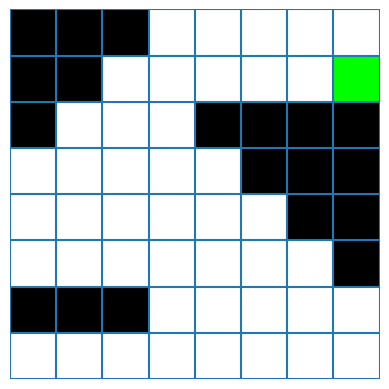

In [2]:
size = (8,8)
goal_reward  = 1000
fail_penalty = -100
time_penalty = -1
outOfBoundsList = [(x,1) for x in range(3)]
for i in range(4):
    outOfBoundsList += [(x,5-i) for x in range(4+i,8)]
for i in range(3):
    outOfBoundsList += [(x,7-i) for x in range(3-i)]
goalList = [(7,6)]

action_dim = 9

tau = 0.00001
gamma = .99

env = Environment(size,goal_reward,fail_penalty,time_penalty,outOfBoundsList,goalList)
agent = DDPGAgent(action_dim, tau = tau, gamma = gamma)
engine = Engine(env,agent)

env.display()

In [3]:
metrics_vec = engine.train_vec(batch_size=100,trials=10,epsilon=.5)

In [9]:
metrics = engine.train(epsilon=.2, limit = 20, batch_size = 100, trials = 10)

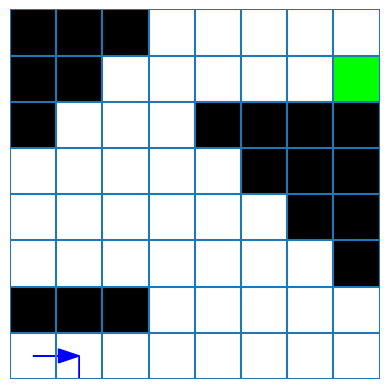

In [8]:
engine.display_run((0,0,0,0),epsilon=1)